Opgave 3 – Verdamping (30 pt)  
Vanaf 1957 wordt ook een variabele Verdamping bijgehouden. Uit de
beschrijving van deze variabele volgt niet direct een duidelijk beeld waar
deze variabele vandaan komt.  
 Bepaal een zo statistisch valide mogelijk model waarmee
Verdamping uitgedrukt kan worden in termen van de andere
variabelen in de dataset.  
 Onderbouw de validiteit van het model.  
 Onderbouw waarom dit het beste model is.  
Houd er rekening mee dat er veel numerieke variabelen in de dataset
zitten. Dat betekent bijvoorbeeld dat een heatmap onleesbaar kan worden,
en dat een pairplot heel lang duurt om te berekenen (echt minuten).
Let op dat veel variabelen onderling sterk gecorreleerd zijn.  

Regressiemodel

In [45]:
# De benodigde bibliotheken inladen
import pandas as pd                   # Deze drie heb je eigenlijk altijd wel nodig
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                  # Hiermee maak je mooiere grafieken, zoals de heatmat en de pairplot
import statsmodels as st             
import statsmodels.api as sm           # Hierin zitten onder meer de QQ-plot en de Influence plot
import statsmodels.formula.api as smf  # Hiermee kun je het lineaire regressiemodel opstellen en schatten
import statsmodels.stats.api as sms    # Hierin zit de Breuch-Pagan toets
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats                # De meeste toetsen zitten hierin

In [46]:
df = pd.read_csv('etmgeg2.csv',sep=',') 
df

,Datum,Jaar,Maand,Dag,Staatshoofd,WindrVec,WindrCat9,WindrCat5,Windsnelh,WindsnelhGem,...,ZichtMaxCat85,ZichtMaxCat5,ZichtMaxUur,BewolkingGem,VochtighGem,VochtighMax,VochtighMaxUur,VochtighMin,VochtighMinUur,Verdamping
0,27-4-1901,1901,4,27,Wilhelmina,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,NaN
1,30-4-1901,1901,4,30,Wilhelmina,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,84,NaN,NaN,NaN,NaN,NaN
2,31-8-1901,1901,8,31,Wilhelmina,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN,NaN,NaN
3,27-4-1902,1902,4,27,Wilhelmina,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,43,NaN,NaN,NaN,NaN,NaN
4,30-4-1902,1902,4,30,Wilhelmina,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,27-4-2023,2023,4,27,Willem-Alexander,117.0,ZO,O,2.5,2.9,...,45-50 km,uitstekend,8.0,7/8,61,98.0,2.0,39.0,13.0,3.0
367,30-4-2023,2023,4,30,Willem-Alexander,99.0,O,O,1.7,1.9,...,45-50 km,uitstekend,14.0,6/8,73,98.0,2.0,45.0,16.0,3.2
368,31-8-2023,2023,8,31,Willem-Alexander,260.0,W,W,2.0,2.7,...,45-50 km,uitstekend,10.0,6/8,78,97.0,6.0,49.0,13.0,3.1
369,27-4-2024,2024,4,27,Willem-Alexander,131.0,ZO,O,2.3,2.9,...,45-50 km,uitstekend,16.0,8/8,80,93.0,2.0,61.0,16.0,1.9


In [48]:
df.describe()

df.isnull().sum() 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Datum             371 non-null    object 
 1   Jaar              371 non-null    int64  
 2   Maand             371 non-null    int64  
 3   Dag               371 non-null    int64  
 4   Staatshoofd       371 non-null    object 
 5   WindrVec          360 non-null    float64
 6   WindrCat9         360 non-null    object 
 7   WindrCat5         360 non-null    object 
 8   Windsnelh         360 non-null    float64
 9   WindsnelhGem      360 non-null    float64
 10  WindsnelhMax      360 non-null    float64
 11  WindsnelhMaxUur   360 non-null    float64
 12  WindsnelhMin      360 non-null    float64
 13  WindsnelhMinUur   360 non-null    float64
 14  Windstoot         221 non-null    float64
 15  WindstootUur      217 non-null    float64
 16  TempGem           371 non-null    float64
 1

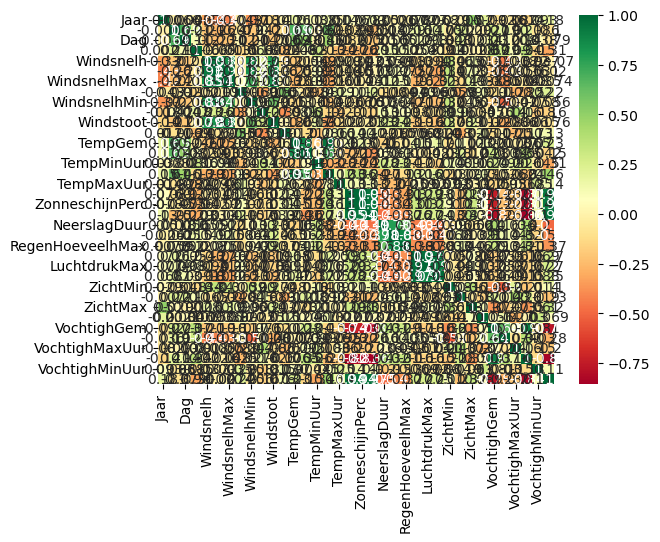

In [49]:
# Je kunt allerlei kleuren kiezen bij cmap, met RdYlGn zijn de donkergroene en -rode degene met de sterkste correlatie
heat = sns.heatmap(df.corr(numeric_only = True), cmap="RdYlGn", annot=True)
plt.show()

In [50]:
#non_numeric_columns = ['Datum', 'Jaar', 'Maand', 'Dag', 'Staatshoofd']
#df = df.drop(columns=non_numeric_columns) 
#df

In [51]:
# df.fillna(df.mean(), inplace=True) 
# print(df.isnull().sum()) 
 
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)


Datum                0.000000
Jaar                 0.000000
Maand                0.000000
Dag                  0.000000
Staatshoofd          0.000000
WindrVec             2.964960
WindrCat9            2.964960
WindrCat5            2.964960
Windsnelh            2.964960
WindsnelhGem         2.964960
WindsnelhMax         2.964960
WindsnelhMaxUur      2.964960
WindsnelhMin         2.964960
WindsnelhMinUur      2.964960
Windstoot           40.431267
WindstootUur        41.509434
TempGem              0.000000
TempMin              0.000000
TempMinUur          40.431267
TempMax              0.000000
TempMaxUur          40.431267
Zonneschijn          0.539084
ZonneschijnPerc      0.539084
Straling            45.822102
NeerslagDuur        23.989218
RegenHoeveelh        4.582210
RegenHoeveelhMax     4.582210
LuchtdrukGem         0.808625
LuchtdrukMax         0.808625
LuchtdrukMin         0.808625
ZichtMin            43.665768
ZichtMinCat85       43.665768
ZichtMinCat5        43.665768
ZichtMinUu

TempGem             0
TempMin             0
TempMax             0
VochtighGem         0
RegenHoeveelh       0
RegenHoeveelhMax    0
Zonneschijn         0
ZonneschijnPerc     0
LuchtdrukGem        0
LuchtdrukMax        0
LuchtdrukMin        0
Verdamping          0
dtype: int64
                   TempGem   TempMin   TempMax  VochtighGem  RegenHoeveelh  \
TempGem           1.000000  0.855424  0.947933     0.020761      -0.098080   
TempMin           0.855424  1.000000  0.683592     0.283350       0.061802   
TempMax           0.947933  0.683592  1.000000    -0.145168      -0.184170   
VochtighGem       0.020761  0.283350 -0.145168     1.000000       0.300649   
RegenHoeveelh    -0.098080  0.061802 -0.184170     0.300649       1.000000   
RegenHoeveelhMax -0.039820  0.112344 -0.123816     0.280566       0.883084   
Zonneschijn       0.118674 -0.220728  0.331151    -0.739540      -0.334924   
ZonneschijnPerc   0.148851 -0.193063  0.358370    -0.727625      -0.333845   
LuchtdrukGem      0.1

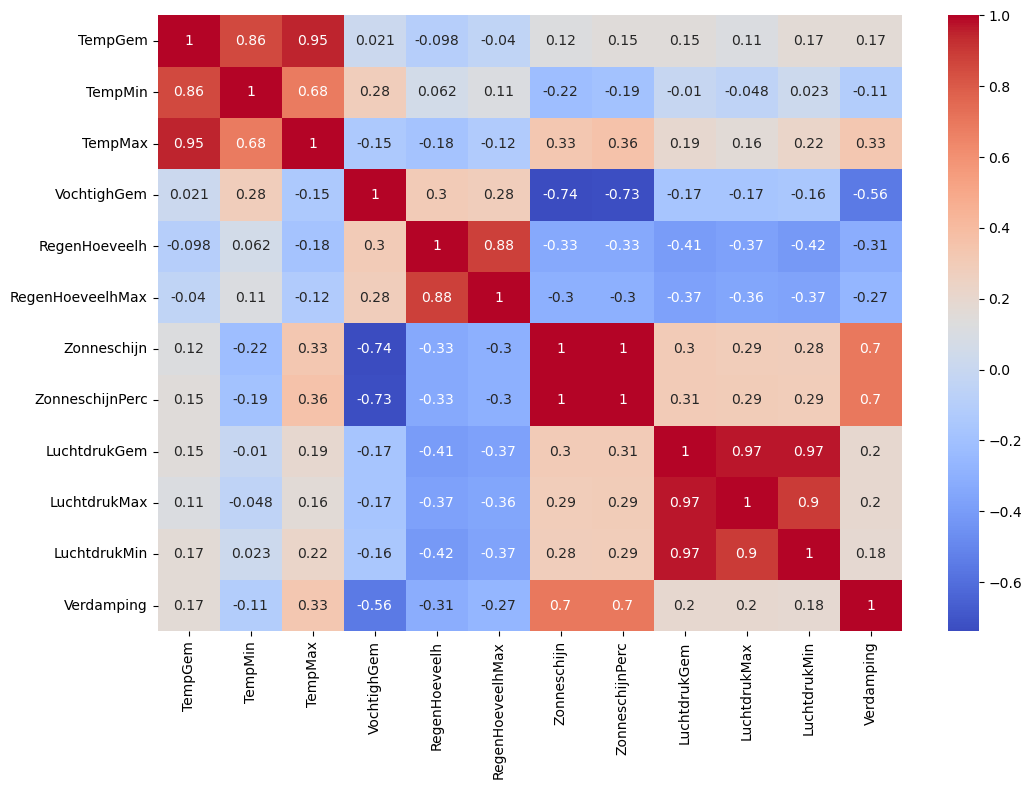

In [52]:
geselecteerde_kolommen = [
    'TempGem', 'TempMin', 'TempMax', 'VochtighGem', 
    'RegenHoeveelh', 'RegenHoeveelhMax', 'Zonneschijn',  # Op basis van de percentages heb ik alles boven de 40% weggelaten. 
    'ZonneschijnPerc', 'LuchtdrukGem', 'LuchtdrukMax', 
    'LuchtdrukMin', 'Verdamping'
]

df[geselecteerde_kolommen] = df[geselecteerde_kolommen].fillna(df[geselecteerde_kolommen].mean())    #missende waarden invullen met de gemiddelde

print(df[geselecteerde_kolommen].isnull().sum()) #controleren of de missende waarden zijn ingevuld

correlation_matrix = df[geselecteerde_kolommen].corr()      #correlatie matrix bekijken
print(correlation_matrix)

# Heatmap van de correlatiematrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show() 

In [61]:
categ_kolommen = ['Staatshoofd','WindrCat9', 'WindrCat5', 'ZichtMaxCat85', 'ZichtMaxCat5', 'ZichtMinCat5', 'ZichtMinCat85', 'BewolkingGem']  
for kolom in categ_kolommen:
    meest_voorkomende_waarde = df[kolom].mode()[0]  # Vind de meest voorkomende waarde
    df[kolom].fillna(meest_voorkomende_waarde, inplace=True)  # Vervang ontbrekende waarden door de meest voorkomende waarde

df.isnull().sum() # Controleer of ontbrekende waarden zijn verwerkt

Datum                 0
Jaar                  0
Maand                 0
Dag                   0
Staatshoofd           0
WindrVec             11
WindrCat9             0
WindrCat5             0
Windsnelh            11
WindsnelhGem         11
WindsnelhMax         11
WindsnelhMaxUur      11
WindsnelhMin         11
WindsnelhMinUur      11
Windstoot           150
WindstootUur        154
TempGem               0
TempMin               0
TempMinUur          150
TempMax               0
TempMaxUur          150
Zonneschijn           0
ZonneschijnPerc       0
Straling            170
NeerslagDuur         89
RegenHoeveelh         0
RegenHoeveelhMax      0
LuchtdrukGem          0
LuchtdrukMax          0
LuchtdrukMin          0
ZichtMin            162
ZichtMinCat85         0
ZichtMinCat5          0
ZichtMinUur         162
ZichtMax            162
ZichtMaxCat85         0
ZichtMaxCat5          0
ZichtMaxUur         162
BewolkingGem          0
VochtighGem           0
VochtighMax         147
VochtighMaxUur  

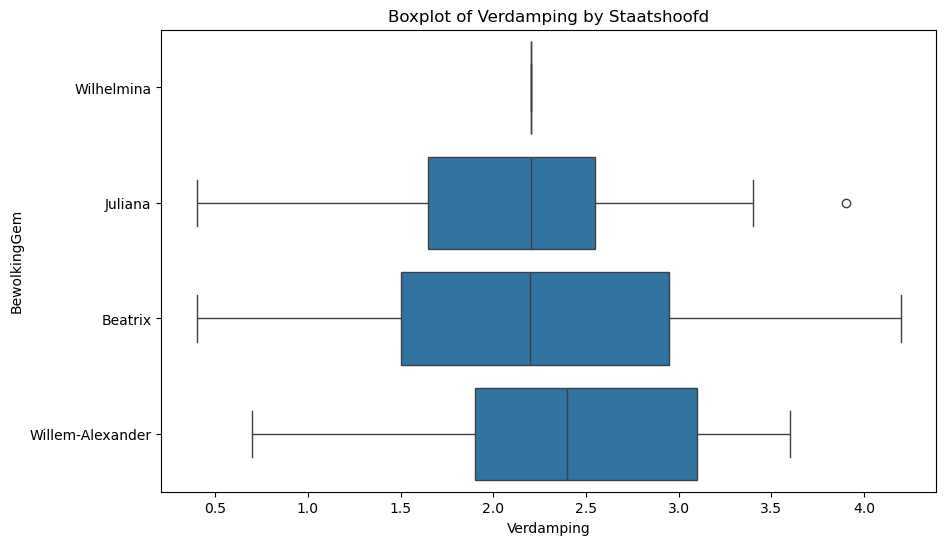

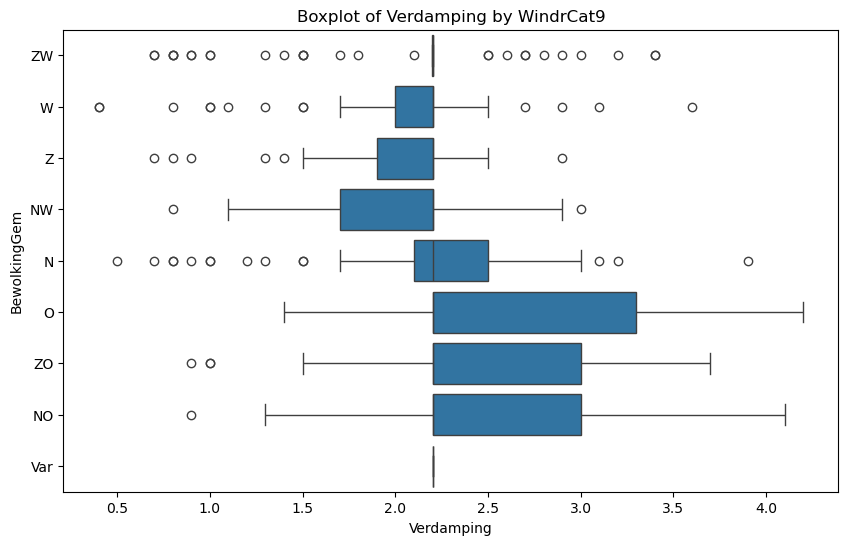

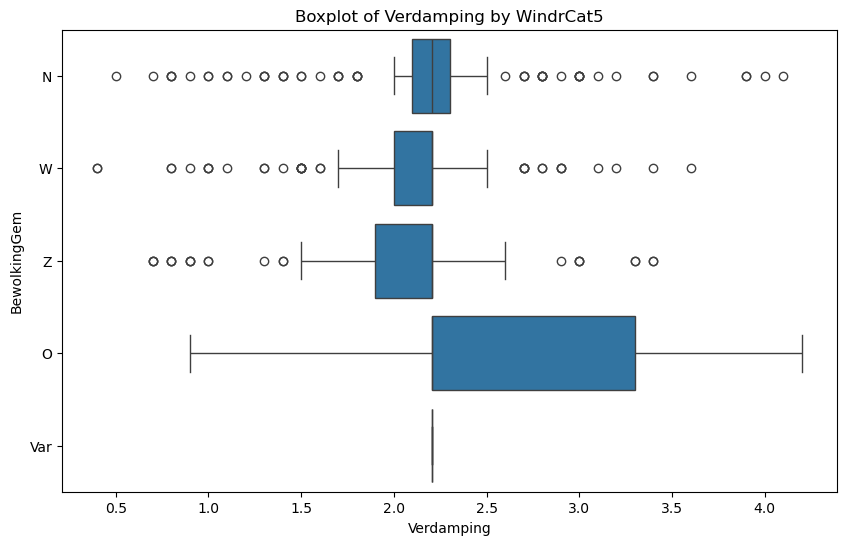

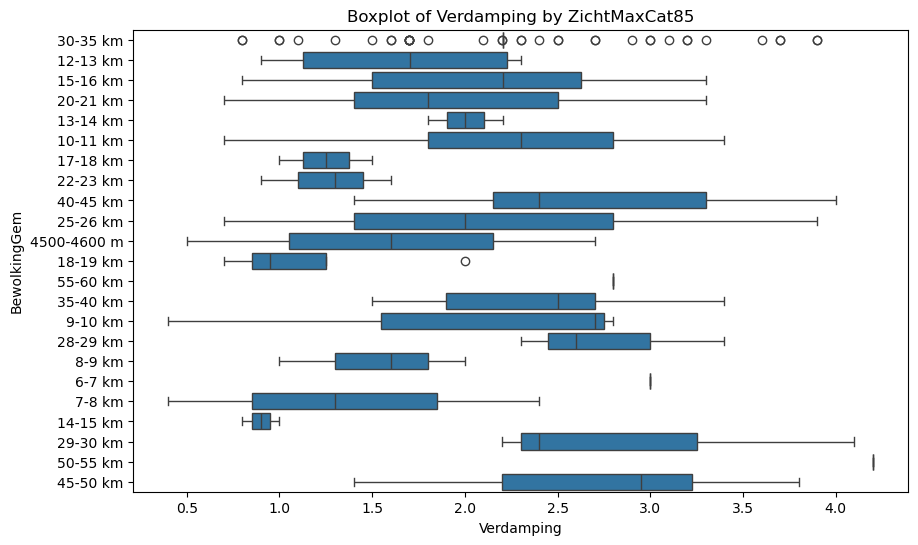

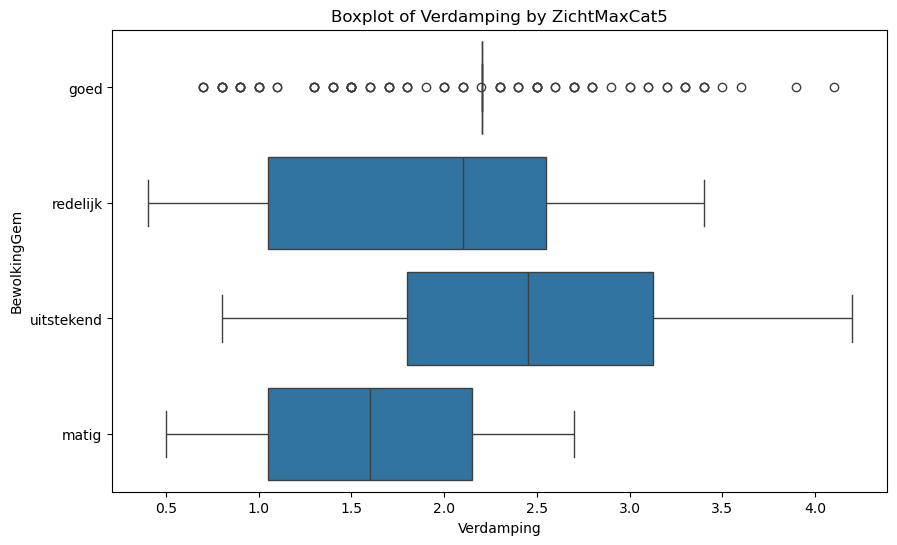

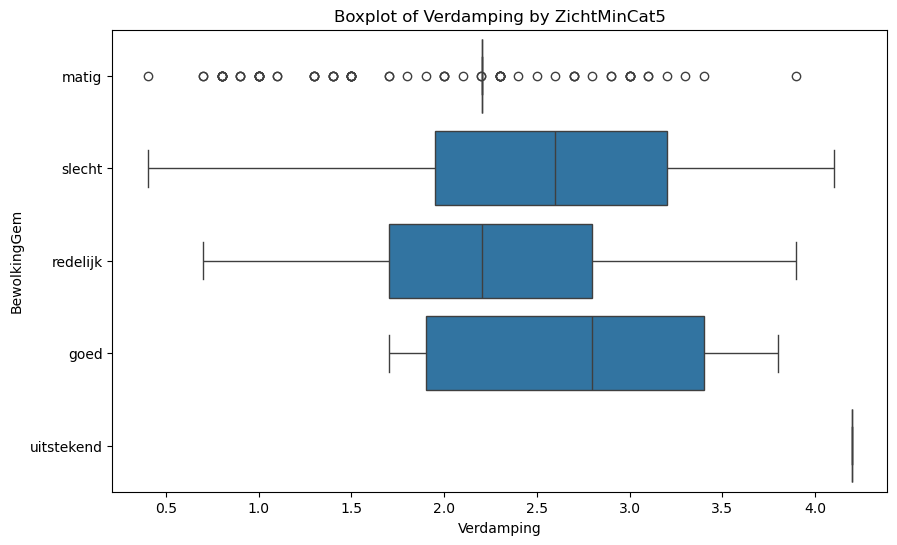

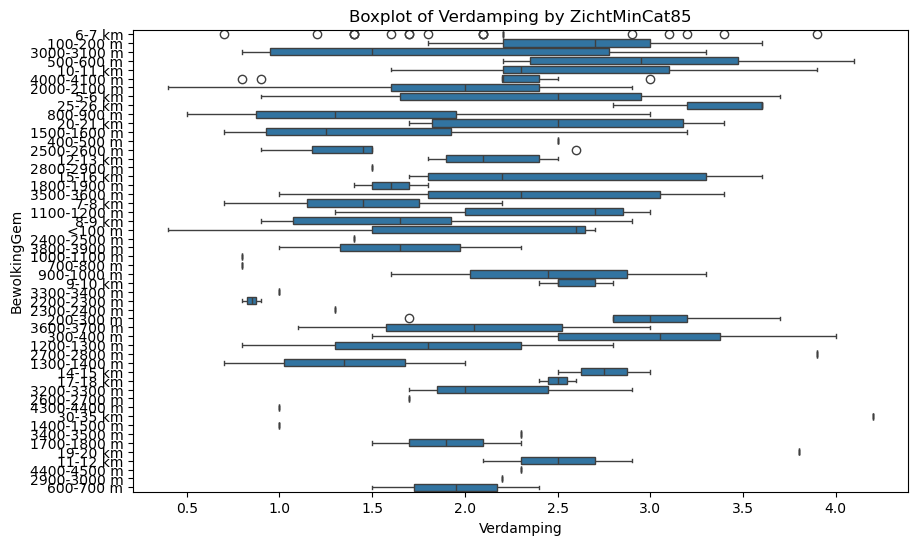

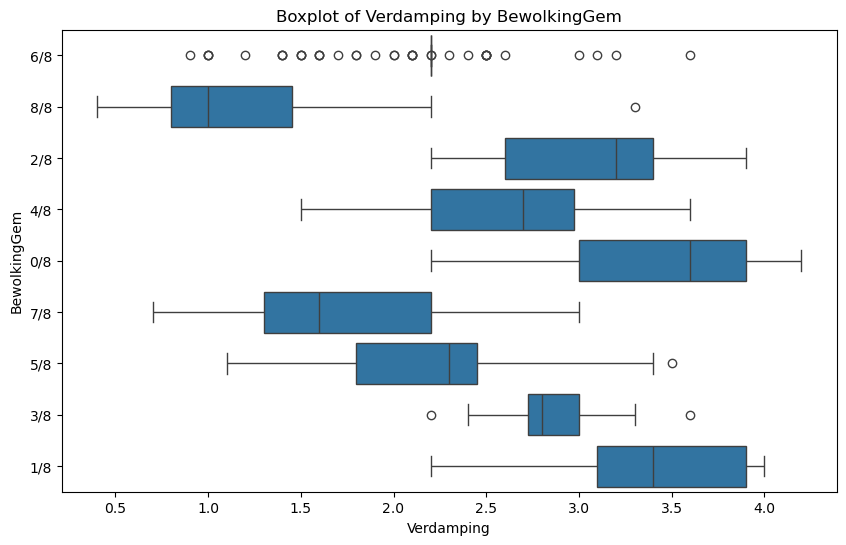

In [62]:
for kolom in categ_kolommen:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['Verdamping'], y=df[kolom])
    plt.title(f'Boxplot of Verdamping by {kolom}')
    plt.xlabel('Verdamping')
    plt.ylabel(column)
    plt.show()  

In [ ]:
# Deze stap herhaal je eventueel als je na stap 5 nog niet tevreden bent
# ____________________________
# eventueel data 'manipuleren'
# Ik heb hier een paar veelgebruikte commando's geplakt, dan hoef ik ze niet elke keer opnieuw te bedenken of op te zoeken.

# df['meat'] = df.type.map({'Meat':1,'Poultry':0,'Beef':0}) # zet een string variabele om naar een dummy
# emma = df.where(df.novel=='Emma').word_length.dropna()    # deze heeft die .dropna() nodig, omdat er blijkbaar NaN's komen in records die niet geselecteerd zijn?
#----*** De regel hieronder is nieuw: die werkt 'handiger' dan de regel hierboven, zonder dat je de dropna() nodig hebt
# emma = df[df.novel=='Emma'].word_Length                   # Deze heeft dat probleem van hierboven niet, deze is dus logischer
#-----
# df['Season'].replace('winter1', 'winter', inplace=True)   # als je inplace=True weglaat (of =False zet) krijg je een nieuw DataFrame
# df.Jaarhuur.replace(' ',0,inplace=True)
# df.Jaarhuur.replace(0,np.nan,inplace=True)
df['Intensief']=df.Werknmrs/df.Vloer